## Text Splitters

Once we have loaded documents, we will often want to transform them to better suit our application. The simplest example might be to split a long document into smaller chunks that can fit into our models context window. LangChain has a number of built in document transformers that make it easy to split, combine, filter and otherwise manipulate documents.

When we want to deal with long pieces of text, it is necessary to split up that text into chunks. As simple as this sounds, there is a lot of potential complexity here. Ideally, we want to keep the semantically related pieces of text together. This notebook will showcase several ways to do that.

At a high level, text splitters work as following:
1. Split the text up into smnall, semantically meaningful chunks (often sentences)
2. Start combining these small chunks into a larger chunk until you reach a certain size
3. Once we reach that size, make that chunk its own piece of text and then start creating a new chunk of text with some overlap (to keep context between chunks)
That means there are two different axes along which we can customize the text splitter

1. How is the text split?
2. How the chunk size is measured?


In [3]:
from langchain.text_splitter import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    separator = "\n\n",
    chunk_size = 200,
    chunk_overlap = 20,
    length_function = len,
    is_separator_regex = False
)

In [17]:
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://www.eand.com/en/who-we-are.html")
data = loader.load()

### The following code will not give documents it just splits text

In [21]:
chunks = text_splitter.split_text(data[0].page_content)
len(chunks)

29

### Document Splitters
### LangChain uses document splitters to break down large chunks of text into smaller, more manageable pieces. 

#### This is done for the following reasons:
#### 1. Compatibility with models: Many ML models, particularly LLMs have limitations on the amount of text they can handle at once. Splitting documents allows you to feed smaller, digestible portions to the model, ensuring it can process the information effectively
#### 2. Improved Performance: Processing smaller chunks of text can often lead to faster and more efficeint model training and inference. This is because the model doesn't need to load and manipulate the entire document at once, reducing memory usage and computational demands

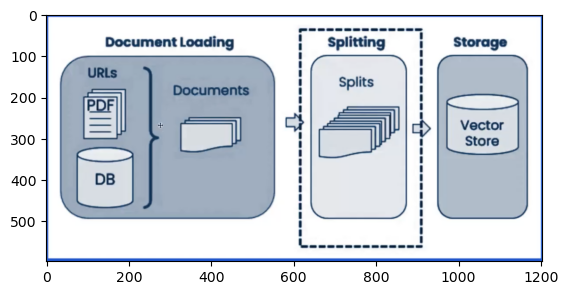

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('text_splitter.png')
imgplot = plt.imshow(img)
plt.show()

In [27]:
for chunk in chunks:
    print(chunk)
    print("------")

e& (etisalat and ) | Global technology group | Who We Are

Who we are


																	 About Us

																	 Governance

																	 Senior Management

																	 Our Strategy
------
Sustainability

																	 Awards and recognitions

																	 Carrier & Wholesale

 universe


Since 1976, we have given people the power to come together .
------
Our brands


 UAE

 life

 international

 enterprise

 capital

At e&, we do more so you can be more. Our mission is to enrich every day, every moment, for everyone we reach.


Investors
------
Investors


																	 Financial Highlights

																	 Share Information

																	 Debt Profile

																	 Dividends

																	 Analyst Coverage
------
Financial Results

																	 Annual Reports

																	 Financial Calendar

																	 Corporate Announcements


Invest in e&
------
Invest in e&

We operate in 38 countries across Middle East, Asia, Africa 

### Create document will create the documents

In [29]:
documents = text_splitter.create_documents([data[0].page_content])
len(documents)

29

In [31]:
for doc in documents:
    print(doc)
    print("----")

page_content='e& (etisalat and ) | Global technology group | Who We Are

Who we are


																	 About Us

																	 Governance

																	 Senior Management

																	 Our Strategy'
----
page_content='Sustainability

																	 Awards and recognitions

																	 Carrier & Wholesale

 universe


Since 1976, we have given people the power to come together .'
----
page_content='Our brands


 UAE

 life

 international

 enterprise

 capital

At e&, we do more so you can be more. Our mission is to enrich every day, every moment, for everyone we reach.


Investors'
----
page_content='Investors


																	 Financial Highlights

																	 Share Information

																	 Debt Profile

																	 Dividends

																	 Analyst Coverage'
----
page_content='Financial Results

																	 Annual Reports

																	 Financial Calendar

																	 Corporate Announcements


Invest in e&'
----
page_cont

# RecursiveCharacterTextSplitter

This text splitter is the recommended one for generic tasks. It is parameterized by a list of characters. It tries to split on them in order until the chunks are small enough. The default list is ["\n\n", "\n", " ", ""]. This has the effect of trying to keep all paragraphs (and then sentences and words) together as long as possible, as those would generally seem to be the strongest semantically related pieces of text.

In [39]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

rectext_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 100,
    chunk_overlap = 20,
    length_function = len,
    is_separator_regex = False
)

In [43]:
texts = rectext_splitter.create_documents([data[0].page_content])

for text in texts:
    print(text)
    print("---")

page_content='e& (etisalat and ) | Global technology group | Who We Are'
---
page_content='Who we are




																	 About Us'
---
page_content='Governance

																	 Senior Management

																	 Our Strategy'
---
page_content='Sustainability

																	 Awards and recognitions'
---
page_content='Carrier & Wholesale

 universe'
---
page_content='Since 1976, we have given people the power to come together .








Our brands'
---
page_content='Our brands




 UAE

 life

 international

 enterprise

 capital'
---
page_content='At e&, we do more so you can be more. Our mission is to enrich every day, every moment, for'
---
page_content='every moment, for everyone we reach.'
---
page_content='Investors




																	 Financial Highlights

																	 Share Information'
---
page_content='Debt Profile

																	 Dividends

																	 Analyst Coverage'
---
page_content='Financial Results

																	 Annual Reports'
---
page_co

#### Recursive Text Splitter will retain the semantic relevance of the documents. They are going to be semantically complete and relevant, it will be mindful of the semantic meaning. Therefore, complete meaningful sentences will be formed.